In [27]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sbs
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow
from tensorflow import data

In [9]:
file_data = 'DS_Agua_2017_2022.csv'
path_name='data/'
arquivo = f'{path_name}{file_data}'

In [10]:
dataset = pd.read_csv(arquivo, sep =';', encoding = 'latin1', decimal='.')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45240 entries, 1 to 45240
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DT_MEDICAO_HORA         45240 non-null  object 
 1   PRECIPITACAO            45240 non-null  float64
 2   PRESSAO_ATMOSFERICA     45240 non-null  float64
 3   TEMPERATURA_DO_AR_C     45240 non-null  float64
 4   UMIDADE_RELATIVA_DO_AR  45240 non-null  float64
 5   VELOCIDADE_VENTO        45240 non-null  float64
 6   VL_MEDICAO              45240 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


In [12]:
#verifica se existe variáveis nulas 
dataset.isna().sum()

DT_MEDICAO_HORA           0
PRECIPITACAO              0
PRESSAO_ATMOSFERICA       0
TEMPERATURA_DO_AR_C       0
UMIDADE_RELATIVA_DO_AR    0
VELOCIDADE_VENTO          0
VL_MEDICAO                0
dtype: int64

In [13]:
dataset.head(10)

,DT_MEDICAO_HORA,PRECIPITACAO,PRESSAO_ATMOSFERICA,TEMPERATURA_DO_AR_C,UMIDADE_RELATIVA_DO_AR,VELOCIDADE_VENTO,VL_MEDICAO
1,2017-01-01 00:00:00,0.0,1009.5,25.9,75.0,1.3,5016.845991
2,2017-01-01 01:00:00,0.0,1009.6,25.7,76.0,0.9,4998.296902
3,2017-01-01 02:00:00,0.0,1009.2,25.6,76.0,1.1,5013.330096
4,2017-01-01 03:00:00,0.0,1008.4,25.9,77.0,1.7,4972.739746
5,2017-01-01 04:00:00,0.0,1008.1,23.7,85.0,1.7,4921.942265
6,2017-01-01 05:00:00,0.2,1007.5,23.7,87.0,0.4,4838.136258
7,2017-01-01 06:00:00,0.0,1007.3,24.2,88.0,0.5,4833.215005
8,2017-01-01 07:00:00,0.0,1007.3,24.2,87.0,0.7,4795.247653
9,2017-01-01 08:00:00,0.0,1007.7,24.7,85.0,1.0,4763.098501
10,2017-01-01 09:00:00,0.0,1008.5,25.1,83.0,1.2,4715.598748


In [14]:
#tratando o dataframe
n_time_steps=3
df = pd.DataFrame()
df['VL_MEDICAO']=dataset['VL_MEDICAO']

#transformação da série => janela deslizande com 1 passo de tempo
for n_step in range(1,n_time_steps+1,1):
 df['vl-'+str(n_step)]=dataset['VL_MEDICAO'].shift(n_step)  
 
df['tp-n']=dataset['TEMPERATURA_DO_AR_C']
df['pr-n']=dataset['PRESSAO_ATMOSFERICA']
df['vv-n']=dataset['VELOCIDADE_VENTO']
df['ur-n']=dataset['UMIDADE_RELATIVA_DO_AR']
df['ch-n']=dataset['PRECIPITACAO']

df.dropna(inplace=True)
df.head(15)

,VL_MEDICAO,vl-1,vl-2,vl-3,tp-n,pr-n,vv-n,ur-n,ch-n
4,4972.739746,5013.330096,4998.296902,5016.845991,25.9,1008.4,1.7,77.0,0.0
5,4921.942265,4972.739746,5013.330096,4998.296902,23.7,1008.1,1.7,85.0,0.0
6,4838.136258,4921.942265,4972.739746,5013.330096,23.7,1007.5,0.4,87.0,0.2
7,4833.215005,4838.136258,4921.942265,4972.739746,24.2,1007.3,0.5,88.0,0.0
8,4795.247653,4833.215005,4838.136258,4921.942265,24.2,1007.3,0.7,87.0,0.0
9,4763.098501,4795.247653,4833.215005,4838.136258,24.7,1007.7,1.0,85.0,0.0
10,4715.598748,4763.098501,4795.247653,4833.215005,25.1,1008.5,1.2,83.0,0.0
11,4712.059896,4715.598748,4763.098501,4795.247653,26.2,1009.0,1.5,77.0,0.0
12,4657.193811,4712.059896,4715.598748,4763.098501,28.4,1009.5,1.6,67.0,0.0
13,4683.363206,4657.193811,4712.059896,4715.598748,28.7,1010.0,1.6,68.0,0.0


In [18]:

#Do total de 45239 linhas, foram separadas 75% para treinamento e 25% para teste
nlinhas = int(np.round(dataset.shape[0] * 0.75)) # 

#nlinhas = 33929 # 75% do dataset
X_train = df.iloc[0:nlinhas,1: 6 + n_time_steps]
X_test = df.iloc[nlinhas:dataset.shape[0],1: 6 + n_time_steps]

y_train = df.iloc[0:nlinhas,0].values
y_test = df.iloc[nlinhas:dataset.shape[0],0].values


In [19]:
def treinar_LSTM(X_train, y_train, N_Nos_Layer1, N_Nos_Layer2,N_Nos_Layer3, EPOCAS , batch_size = 4096):
  train_feature = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
  train_label = np.array(y_train).reshape((y_train.shape[0], 1, 1))

  # Armazena a hora de início da execução do Treinamento
  # batch_size = 4096 # Tamanho de cada lote de processamento usando para o modelo abstrair os padrões
  # EPOCAS é o número de vezes que o conjunto de lotes irá ser processado pelo modelo na fase de treinamento.

  train_data = data.Dataset.from_tensor_slices((train_feature, train_label))
  train_data = train_data.repeat().batch(batch_size, drop_remainder=True)

  
  model = keras.Sequential()
  model.add(layers.LSTM(N_Nos_Layer1, batch_input_shape=(batch_size, train_feature.shape[1], train_feature.shape[2]),  return_sequences=True, activation='relu'))  
  model.add(layers.LSTM(N_Nos_Layer2, batch_input_shape=(N_Nos_Layer1, train_feature.shape[1], train_feature.shape[2]), return_sequences=True, activation='relu'))  
  model.add(layers.Dense(N_Nos_Layer3, activation="relu"))
  model.add(layers.Dense(1))

  #mean_squared_error
  model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['mape'])
  model.summary()
  steps_per_epoch = len(train_feature) // batch_size 
  history = model.fit(train_data, epochs=EPOCAS, steps_per_epoch = steps_per_epoch) 

  val_feature = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
  val_label = np.array(y_train).reshape((y_train.shape[0], 1, 1))


  train_data = data.Dataset.from_tensor_slices((val_feature, val_label))
  train_data = train_data.repeat().batch(batch_size, drop_remainder=True)

  predict = model.predict(train_data, steps=1)

  val_label=val_label[0:len(predict)]

  predict = np.array(predict).reshape(batch_size,1)
  val_label = np.array(val_label).reshape(batch_size,1)

  val_label=val_label[0:len(predict)]

  #Validação dos resultados

  #Calcular o MAPE (Erro médio percentual absoluto)
  MAPE = ((np.mean(np.abs(val_label -predict) / (val_label)))) * 100 
  
  return MAPE, model

In [ ]:
def previsao_LSTM(X_test, y_test, model, batch_size):
  val_feature = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))
  val_label = np.array(y_test).reshape((y_test.shape[0], 1, 1))


  test_data = data.Dataset.from_tensor_slices((val_feature, val_label))
  test_data = test_data.repeat().batch(batch_size, drop_remainder=True)

  predict = model.predict(test_data, steps=1)
  #predict = model.predict(train_data, steps=1)

  val_label=val_label[0:len(predict)]

  predict = np.array(predict).reshape(batch_size,1)
  val_label = np.array(val_label).reshape(batch_size,1)

  #Calcular o MAPE (Erro médio percentual absoluto)
  MAPE = ((np.mean(np.abs(val_label -predict) / (val_label)))) * 100
  
  return MAPE, predict, val_label

In [28]:
class BestModel:
  #Classe para armazenar os melhores hiperparâmetros
  def __init__(self,  N_Nos_Layer1, N_Nos_Layer2, N_Nos_Layer3, MAPE, model = 0):
    self.N_Nos_Layer1 = N_Nos_Layer1
    self.N_Nos_Layer2 = N_Nos_Layer2
    self.N_Nos_Layer3 = N_Nos_Layer3
    self.MAPE = MAPE
    self.model = model
  
  def setIndex(self, N_Nos_Layer1, N_Nos_Layer2, N_Nos_Layer3, MAPE, model):
    self.N_Nos_Layer1 = N_Nos_Layer1
    self.N_Nos_Layer2 = N_Nos_Layer2
    self.N_Nos_Layer3 = N_Nos_Layer3
    self.MAPE = MAPE
    self.model = model
        
  def show(self):
    print(" LSTM (", self.N_Nos_Layer1, ",", self.N_Nos_Layer2, ",", self.N_Nos_Layer3, ") MAPE ", self.MAPE)

        
# Efetuar o processo de Calibração da LSTM, variando os hiperparâmetros
#N_Nos_Layer1 = 5
#N_Nos_Layer2 = 15
EPOCAS = 200
batch_size = 4096
MAPE = 100
bestModel = BestModel(N_Nos_Layer1, N_Nos_Layer2, N_Nos_Layer3, MAPE)
arquivo='Result_LSTM_Model.csv'

#n_valores_passado = 10
##criar_arquivo_resultado(arquivo)
#Laço para variação da Camada Oculta 1
for N_Nos_Layer1 in range (32,6,-8):
  #Laço para variação da Camada Oculta 2
  for N_Nos_Layer2 in range (32,6,-8):
    for N_Nos_Layer3 in range (32,6,-8):
      #Chama a função de treinamento da LSTM com os hiperparâmetros selecionados para cada iteração
      MAPE, model = treinar_LSTM(X_train, y_train, N_Nos_Layer1, N_Nos_Layer2, N_Nos_Layer3, EPOCAS, batch_size)
      #armazena o melhor modelo, com o menor MAPE
      if(bestModel.MAPE > MAPE):
        bestModel.setIndex(N_Nos_Layer1, N_Nos_Layer2, N_Nos_Layer3, MAPE, model)
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (4096, 1, 32)             5248      
                                                                 
 lstm_1 (LSTM)               (4096, 1, 32)             8320      
                                                                 
 dense (Dense)               (4096, 1, 32)             1056      
                                                                 
 dense_1 (Dense)             (4096, 1, 1)              33        
                                                                 
Total params: 14,657
Trainable params: 14,657
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
8/8 [==============================] - 2s 36ms/step - loss: 100.8391 - mape: 100.8391
Epoch 2/200
8/8 [==============================] - 0s 43ms/step - loss: 98.6134 - mape

KeyboardInterrupt: 

In [ ]:
bestModel.show()

In [ ]:
MAPE, predict, y_label = previsao_LSTM(X_test, y_test, bestModel.model, batch_size)

In [ ]:
#Estimate Et for treinam and test
# For treinam data
Lt_train = grid.predict(X_train)
Yt_train = y_train
Et_train = Yt_train - Lt_train

# For test data
Lt_test = predict
Yt_test = y_test
Et_test = Yt_test - Lt_test

In [ ]:
# MAPE statistics for test data
((np.mean(np.abs(Yt_test - Lt_test) / (Yt_test)))) * 100

3.319429893123213

In [ ]:
# MAPE statistics for treinam data
((np.mean(np.abs(Yt_train - Lt_train) / (Yt_train)))) * 100

2.4860142953804063

In [ ]:
#create  dataframe of Et value
df_Et = pd.DataFrame(Et_train, columns=['VL_Et'])

for n_step in range(1,n_time_steps+1,1):
    df_Et['vl-'+str(n_step)]=df_Et['VL_Et'].shift(n_step)  

#drop rows with null values
df_Et.dropna(inplace=True)

Nt_train = df_Et['VL_Et']

df_Et.drop(['VL_Et'],axis=1, inplace=True)

X_train = df_Et
y_train = Nt_train

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import data

# MLP model for hybrid prediction for non linear component Et_train 

#Split dataset in treinam /  75% treinam  25% test
nlinhas = int(np.round(X_train.shape[0] * 0.75)) # 
  
max_size_train_split = int(np.round(nlinhas / 5)) 
max_size__test_split = int(np.round((X_train.shape[0] - nlinhas) / 5))
size_split = 5
  
# Cross-validated for time series
ts_cv_mlp = TimeSeriesSplit(
      n_splits=size_split, # Number of divisions
      max_train_size=max_size_train_split,    # maximum size of each set. of training
      gap=2, # number of samples to exclude between each training and testing set
      test_size=max_size__test_split, # maximum size of each set. of test.
)

param_grid = {
     'hidden_layer_sizes': [(4,6,1),(2,6,1),(6,12,1),(6,18,1)], # MLP layers
     'max_iter': [ 500], # maximum iterations
     'activation': [ 'relu','identity'], # activation function
     'solver': ['adam'], # weight optimization algorithm
     'alpha': [0.0001, 0.001, 0.01],  # alpha strength of regularization
}
  
#modelo = MLPRegressor(random_state=0)
model = Sequential()
model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

grid_mlp = GridSearchCV(modelo, param_grid, n_jobs= -1,scoring='neg_mean_absolute_percentage_error', cv=ts_cv_mlp, verbose=1)
grid_mlp.fit(np.array(X_train), np.array(y_train))

resultado = str(grid.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
#MAPE to Et predicted on MLP Model
predict=grid_mlp.predict(X_train)  
((np.mean(np.abs(y_train - predict) / (y_train)))) * 100

c:\Python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


176.17760618927858

In [ ]:
# Recomposition of Nt + Lt form train data
Lt_train2 = Lt_train[n_time_steps:len(Lt_train)]
Yt_train2 = Yt_train[n_time_steps:len(Yt_train)]
Yt_train_predicted = predict + Lt_train2
((np.mean(np.abs(Yt_train2 - Yt_train_predicted) / (Yt_train2)))) * 100

2.4931560386218705

In [ ]:
y_test = Yt_train2
predict = Yt_train_predicted

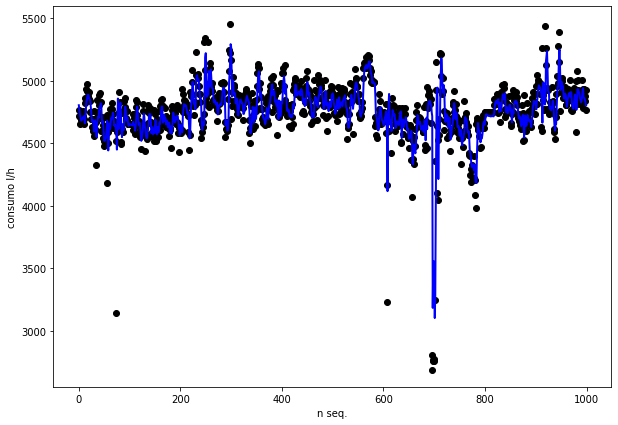

In [ ]:
#O gráfico abaixo mostra os valores reais em preto e os valores prditos em azul
npredicts=1000
pyplot.figure(figsize=(10,7)) 
pyplot.scatter(np.arange(0,y_test.shape[0],1)[0:npredicts],np.array(y_test)[0:npredicts], color = 'black')
pyplot.plot(np.arange(0,predict.shape[0],1)[0:npredicts], np.array(predict)[0:npredicts], color = 'blue', linewidth=2)
pyplot.xlabel('n seq.')
pyplot.ylabel('consumo l/h')
pyplot.show()

In [ ]:
# For test data
#Lt_test = predict
#Yt_test = y_test
#Et_test = Yt_test - Lt_test


#create  dataframe of Et value
df_Et = pd.DataFrame(Et_test, columns=['VL_Et'])

for n_step in range(1,n_time_steps+1,1):
    df_Et['vl-'+str(n_step)]=df_Et['VL_Et'].shift(n_step)  

#drop rows with null values
df_Et.dropna(inplace=True)

Nt_test = df_Et['VL_Et']

df_Et.drop(['VL_Et'],axis=1, inplace=True)

X_test = df_Et
y_test = Nt_test

#MAPE to Et predicted on MLP Model
predict=grid_mlp.predict(X_test)  
MAPE_Nt_test = ((np.mean(np.abs(y_test - predict) / (y_test)))) * 100

# Recomposition of Nt + Lt form test data
Lt_test2 = Lt_test[n_time_steps:len(Lt_test)]
Yt_test2 = Yt_test[n_time_steps:len(Yt_test)]
Yt_test_predicted = predict + Lt_test2
MAPE = ((np.mean(np.abs(Yt_test2 - Yt_test_predicted) / (Yt_test2)))) * 100
print('MAPE',MAPE, ' MAPE_Nt_test',MAPE_Nt_test)

MAPE 3.3811686878982563  MAPE_Nt_test 126.7515475432811


c:\Python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [ ]:
y_test = Yt_test2
predict = Yt_test_predicted

In [ ]:
#Validação dos resultados

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

#Erro médio quadrático  (diferença quadrática média entre os valores estimados e valores reais) - MSE
mean_squared_error(y_test, predict)


269834.3326230365

In [ ]:
#Raiz quadrada do Erro médio - RMSE
np.sqrt(mean_squared_error(y_test, predict))


519.4558043019988

In [ ]:
#Distância absoluta média ou Erro médio absoluto - MAE
median_absolute_error(y_pred=predict, y_true = y_test)


128.65000777800196

In [ ]:
#Calcular o MAPE (Erro médio percentual absoluto)
MAPE = ((np.mean(np.abs(y_test -predict) / (y_test)))) * 100
MAPE

3.3811686878982563